In [50]:
import numpy as np 
import pandas as pd

years_list = np.arange(2015,2101).tolist()

# checking the list is correct 
# for x in range (len(years_list)):
#     print(years_list[x])
    

for i in range(len(years_list)):
    years_list[i] = "data/AIS-86Year/Raw/vars-" +str(years_list[i]) +".txt"

precipitation = pd.read_csv('data/AIS_data/precipitation-0.txt', delimiter='\t', names=["x-axis", "y-axis", "precipitation"])

def create_df(filepath, delimiter, original_column_names):
    df = pd.read_csv(filepath, delimiter = delimiter, names=original_column_names)
    return df

def remove_outliers(df):
    attributes = df.columns  # List of all column names in the DataFrame
    n_attributes = len(attributes)
    for i, attribute in enumerate(attributes):
        # Removing outliers using IQR
        Q1 = df[attribute].quantile(0.25)
        Q3 = df[attribute].quantile(0.75)
        IQR = Q3 - Q1
        
        #I used a factor of 1.5 - just because it seems a common choice 
        filtered_df = df[(df[attribute] >= (Q1 - 1.5 * IQR)) & (df[attribute] <= (Q3 + 1.5 * IQR))]
    return filtered_df

def remove_rows(df):
    #this removes rows which have fill values of 9.96920996839e+36 for the column ocean_temp
    fill_value = 9.969210e+36

    tolerance = 1e-1  # Adjust the tolerance as needed

    # Use numpy isclose to compare with a tolerance
    mask = np.isclose(df['ocean_temp'], fill_value, atol=tolerance)

    # Invert the mask to filter out the rows with the fill value
    df = df[~mask]

    return df


def preprocess_individual_timeslice(df):
    remove_outliers(df)
    remove_rows(df)
    return df
    

def process_individual_files(file_list, original_column_names):
    processed_dfs = []
    for file in file_list:
        df = create_df(file, '\t', original_column_names)
        processed_df = preprocess_individual_timeslice(df)
        processed_dfs.append(processed_df)
    return processed_dfs

original_column_names = ['x-axis', 'y-axis', 'ice_thickness', 'ice_velocity', 
                'ice_mask', 'precipitation', 'air_temp', 'ocean_temp']

processed_dataframes = process_individual_files(years_list, original_column_names)


processed_dataframes[0].head()

,x-axis,y-axis,ice_thickness,ice_velocity,ice_mask,precipitation,air_temp,ocean_temp
0,-3040000,3040000,0.0,NaN,4.0,729.484314,292.419525,9.969210e+36
1,-2918400,3040000,0.0,NaN,4.0,694.645996,273.800354,9.969210e+36
2,-2796800,3040000,0.0,NaN,4.0,691.841736,273.366791,9.969210e+36
3,-2675200,3040000,0.0,NaN,4.0,679.350647,272.888672,9.969210e+36
4,-2553600,3040000,0.0,NaN,4.0,659.845520,272.373596,9.969210e+36


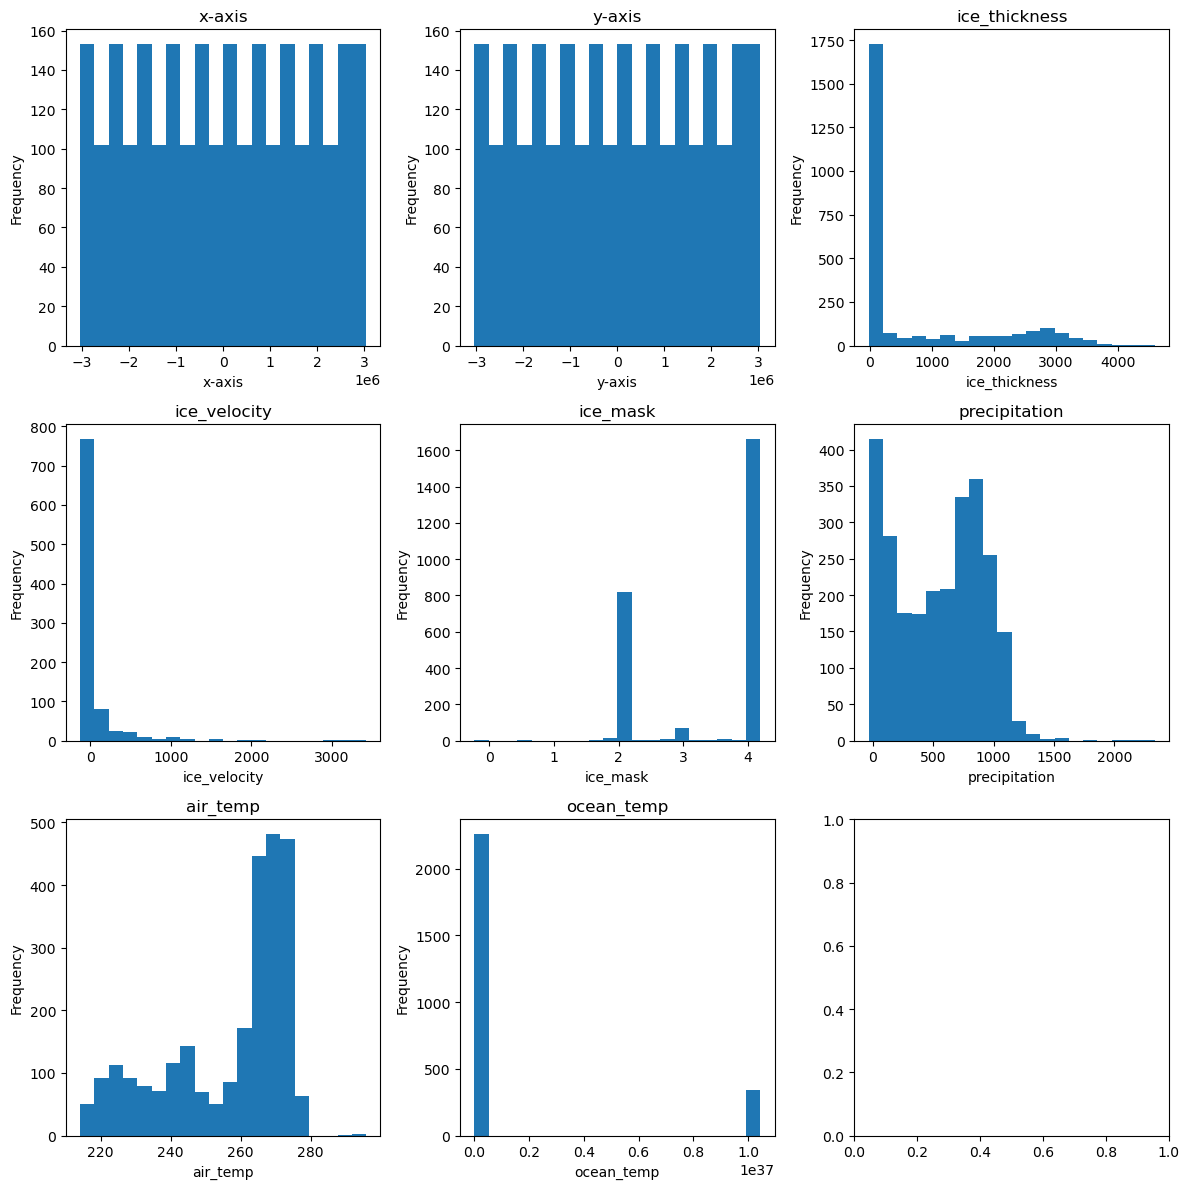

In [37]:
df = processed_dataframes[0]

import matplotlib.pyplot as plt

def plot_attribute_distributions(df):
    attributes = df.columns  # List of all column names in the DataFrame
    n_attributes = len(attributes)
    
    # Calculate the number of rows needed for two columns
    nrows = (n_attributes + 1) // 3
    
    # Set up the matplotlib figure with two columns
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, nrows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, attribute in enumerate(attributes):
        # Plotting the histogram for each attribute
        df[attribute].plot(kind='hist', bins=20, ax=axes[i])
        axes[i].set_title(f'{attribute}')
        axes[i].set_xlabel(attribute)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, nrows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_attribute_distributions(df)



/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


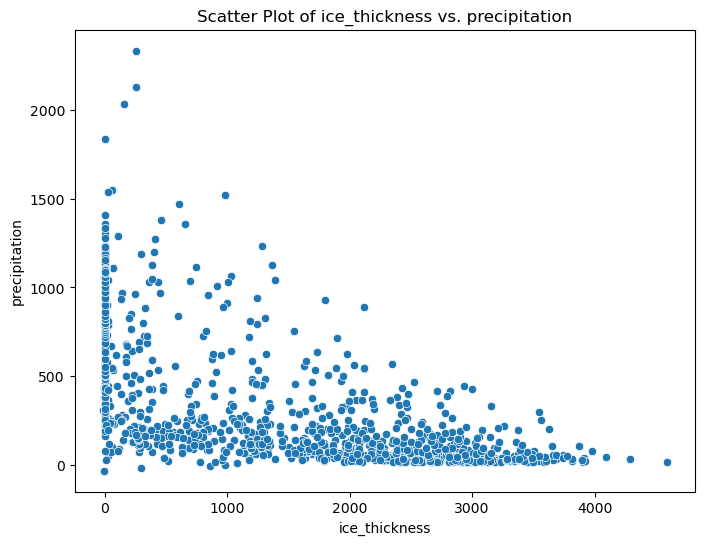

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


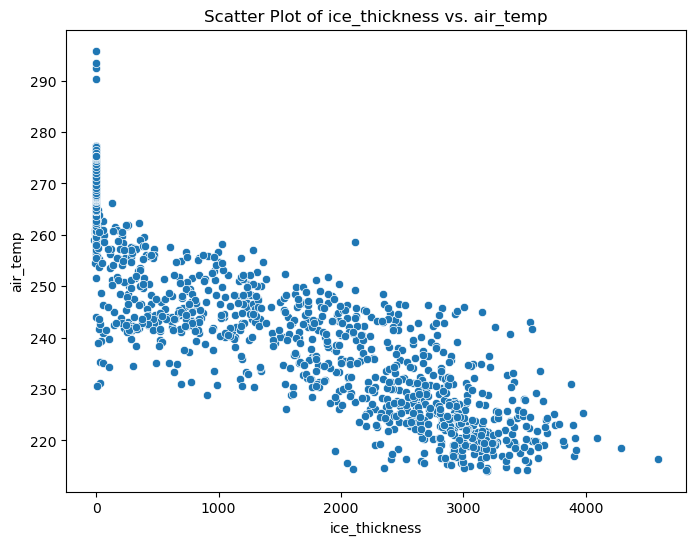

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


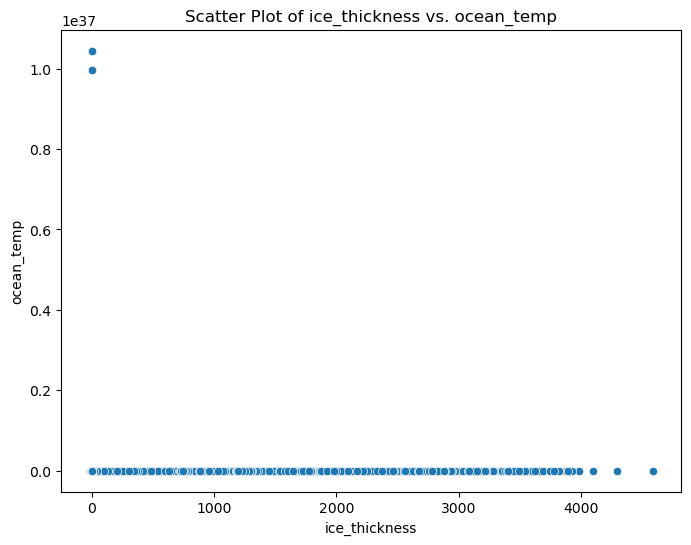

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


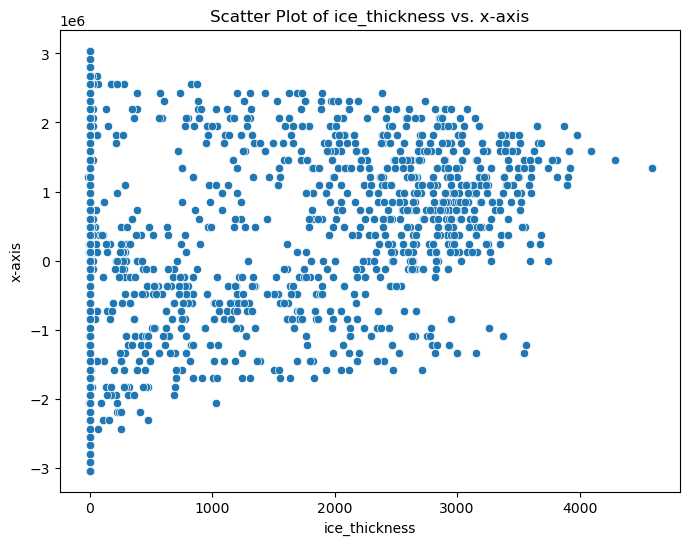

/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/serafinaslevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


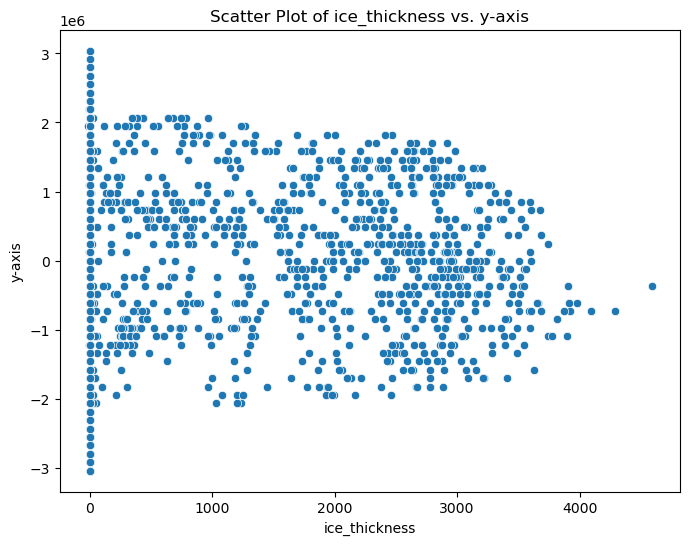

In [35]:
import seaborn as sns


features = ["precipitation", "air_temp", "ocean_temp", "x-axis", "y-axis"]  
target = "ice_thickness"

df = processed_dataframes[0]

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[target], y=df[feature])
    plt.title(f"Scatter Plot of {target} vs. {feature}")
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()
    